In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
from PIL import Image
import numpy as np
import random
import cv2
import albumentations as A

In [2]:
ticTacToe = [imgFile for imgFile in os.listdir('TicTacToe/boards/raw') if imgFile.endswith('.jpg')]
connectFour = os.listdir('ConnectFour/labelren/pictures')
chess = [imgFile for imgFile in os.listdir('Chess/labelren') if imgFile.endswith('.png')]
background = os.listdir('Backgrounds')


tictactoeTransform = A.Compose([
    A.augmentations.geometric.transforms.Perspective(p=1, scale=(0.005, 0.02)),
    A.augmentations.transforms.OpticalDistortion(p=0.2),
    A.augmentations.geometric.transforms.ElasticTransform(p=1, alpha=1, sigma=4, alpha_affine=4),
    A.RandomCrop(160, 160, p=0.25),
    A.InvertImg(p=0.1),
    A.ColorJitter(brightness=0.55, contrast=0.6, saturation=0.6, hue=0.6, p=0.4),
    A.GaussNoise(p=0.12),
    A.Blur(blur_limit=3, p=0.22),
    A.GlassBlur(max_delta=1, iterations=1, p=0.14),
    A.CLAHE(p=0.22, tile_grid_size=(4, 4)),
    A.Sharpen(p=0.18, alpha=0.2, lightness=1.5),
    A.Emboss(p=0.18),
    A.Equalize(p=0.04),
    A.MultiplicativeNoise(p=0.22),
    A.Resize(168, 168, p=1.0),
    A.RandomBrightnessContrast(p=0.22),
    A.RandomGamma(p=0.22),
    A.Solarize(threshold=128, p=0.2),
])

In [3]:
def tic_tac_toe_image(label=False):
    ranImg = random.choice(ticTacToe)
    img = Image.open(
        'TicTacToe/boards/raw/' + ranImg
    ).convert('RGB')
    img = np.array(img)
    img = tictactoeTransform(image=img)['image']
    if label:
        with open('TicTacToe/boards/raw/' + ranImg.replace('.jpg', '.txt')) as f:
            for label in f.readlines():
                class_label, x, y, width, height = [
                    float(x) if float(x) != int(float(x)) else int(x)
                    for x in label.replace("\n", "").split()
                ]
                x, y, width, height = x * 168, y * 168, width * 168, height * 168
                img = cv2.rectangle(
                    img, 
                    (int(x - width / 2), int(y - height / 2)), 
                    (int(x + width / 2), int(y + height / 2)), (255, 0, 0), 1
                )
    return Image.fromarray(img)

def connect_four_image(label=False):
    ranImg = random.choice(connectFour)
    img = Image.open(
        'ConnectFour/labelren/pictures/' + random.choice(connectFour)
    ).resize((168, 168))
    backgroundImage = Image.open(
        'Backgrounds/' + random.choice(background)
    )
    bgCoords = [random.randint(0, backgroundImage.size[0] - 168), random.randint(0, backgroundImage.size[1] - 168)]
    backgroundImage = backgroundImage.crop((
                    *bgCoords,
                    *[x + 168 for x in bgCoords]
                ))
    backgroundImage.paste(img, (0, 0), img)
    backgroundImage.convert('RGB')
    img = np.array(backgroundImage)
    if label:
        with open('ConnectFour/labelren/coords/' + ranImg.replace('lbrn.png', 'coords.txt')) as f:
            cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(x) / 168 for x in cords]
        # y1, y2, y3, y4 = [1 - y for y in [y1, y2, y3, y4]]
        cords = np.array([x1, y1, x2, y2, x3, y3, x4, y4], dtype=np.float32)

        for i in range(4):
            img = cv2.circle(img, (int(cords[i * 2] * 168), int(cords[i * 2 + 1] * 168)), 1, (255, 0, 0), 2)
    return Image.fromarray(img)

def chess_image(label=False):
    ranImg = random.choice(chess)
    img = Image.open(
        'Chess/labelren/' + ranImg
    ).resize((168, 168))
    backgroundImage = Image.open(
        'Backgrounds/' + random.choice(background)
    ).convert('RGB')
    bgCoords = [random.randint(0, backgroundImage.size[0] - 168), random.randint(0, backgroundImage.size[1] - 168)]
    backgroundImage = backgroundImage.crop((
                    *bgCoords,
                    *[x + 168 for x in bgCoords]
                ))
    backgroundImage.paste(img, (0, 0), img)
    backgroundImage.convert('RGB')
    img = np.array(backgroundImage)
    if label:
        with open('Chess/labelren/' + ranImg.replace('chesspic.png', 'chesscoords.txt')) as f:
            cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(x) * (168/418) for x in cords]
        # y1, y2, y3, y4 = [168 - y for y in [y1, y2, y3, y4]]
        
        cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        for i in range(4):
            img = cv2.circle(img, (int(cords[i][0]), int(cords[i][1])), 1, (255, 0, 0), 2)
    return Image.fromarray(img)


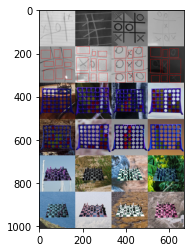

In [4]:
imgWall = Image.new('RGB', (168 * 4, 168 * 6))

for col in range(4):
    for row in range(6):
        if row == 0:
            img = tic_tac_toe_image(label=False)
        elif row == 1:
            img = tic_tac_toe_image(label=True)
        elif row == 2:
            img = connect_four_image(label=False)
        elif row == 3:
            img = connect_four_image(label=False)
        elif row == 4:
            img = chess_image(label=False)
        elif row == 5:
            img = chess_image(label=False)
        
        imgWall.paste(
            img,
            (col * 168, row * 168)
        )

imgWall.save('../assets/data.jpg')
plt.imshow(imgWall)
plt.show()